In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('titanic_train.csv')
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.shape

(891, 13)

In [8]:
df.columns

Index(['Unnamed: 0', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked','Unnamed: 0'],axis='columns',inplace=True)

In [82]:
df.describe()

,Survived,Pclass,Sex,Age,Fare
count,204.000000,204.000000,204.000000,204.000000,204.000000
mean,0.426471,2.573529,0.411765,13.672402,22.959110
std,0.495781,0.694443,0.493364,6.887134,18.674368
min,0.000000,1.000000,0.000000,0.420000,0.000000
25%,0.000000,2.000000,0.000000,8.000000,8.050000
50%,0.000000,3.000000,0.000000,17.000000,14.872900
75%,1.000000,3.000000,1.000000,19.000000,31.275000
max,1.000000,3.000000,1.000000,21.000000,66.112500


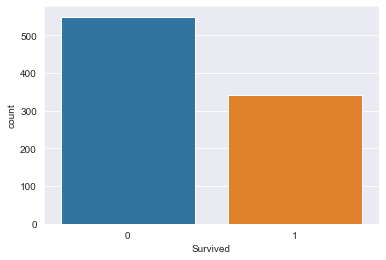

In [11]:
sns.set_style('darkgrid')
sns.countplot(data=df,x='Survived')
plt.show()

<AxesSubplot:>

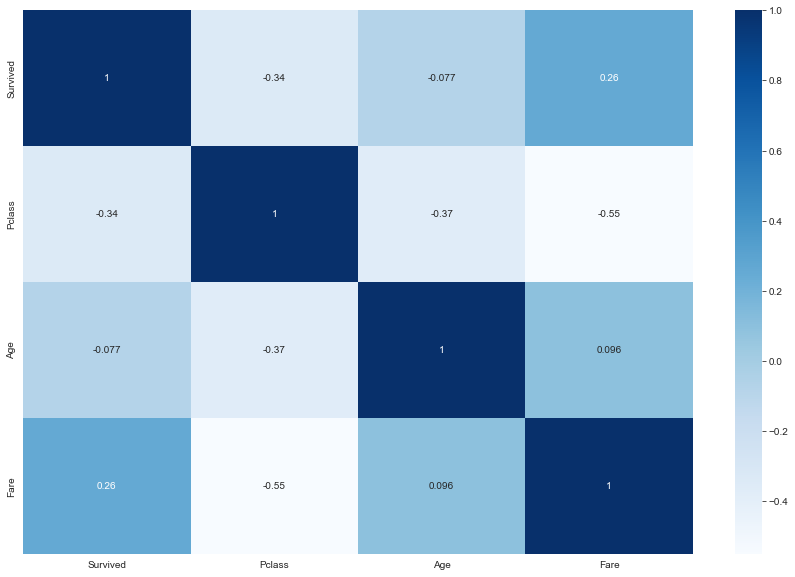

In [12]:
correlation = df.corr()
plt.figure(figsize=(15,10) )
sns.heatmap(correlation,annot = True,cmap = 'Blues')

In [13]:
df["Age"].fillna(df["Age"].mean(),inplace= True)

In [14]:
df.Age.count

<bound method Series.count of 0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64>

<AxesSubplot:>

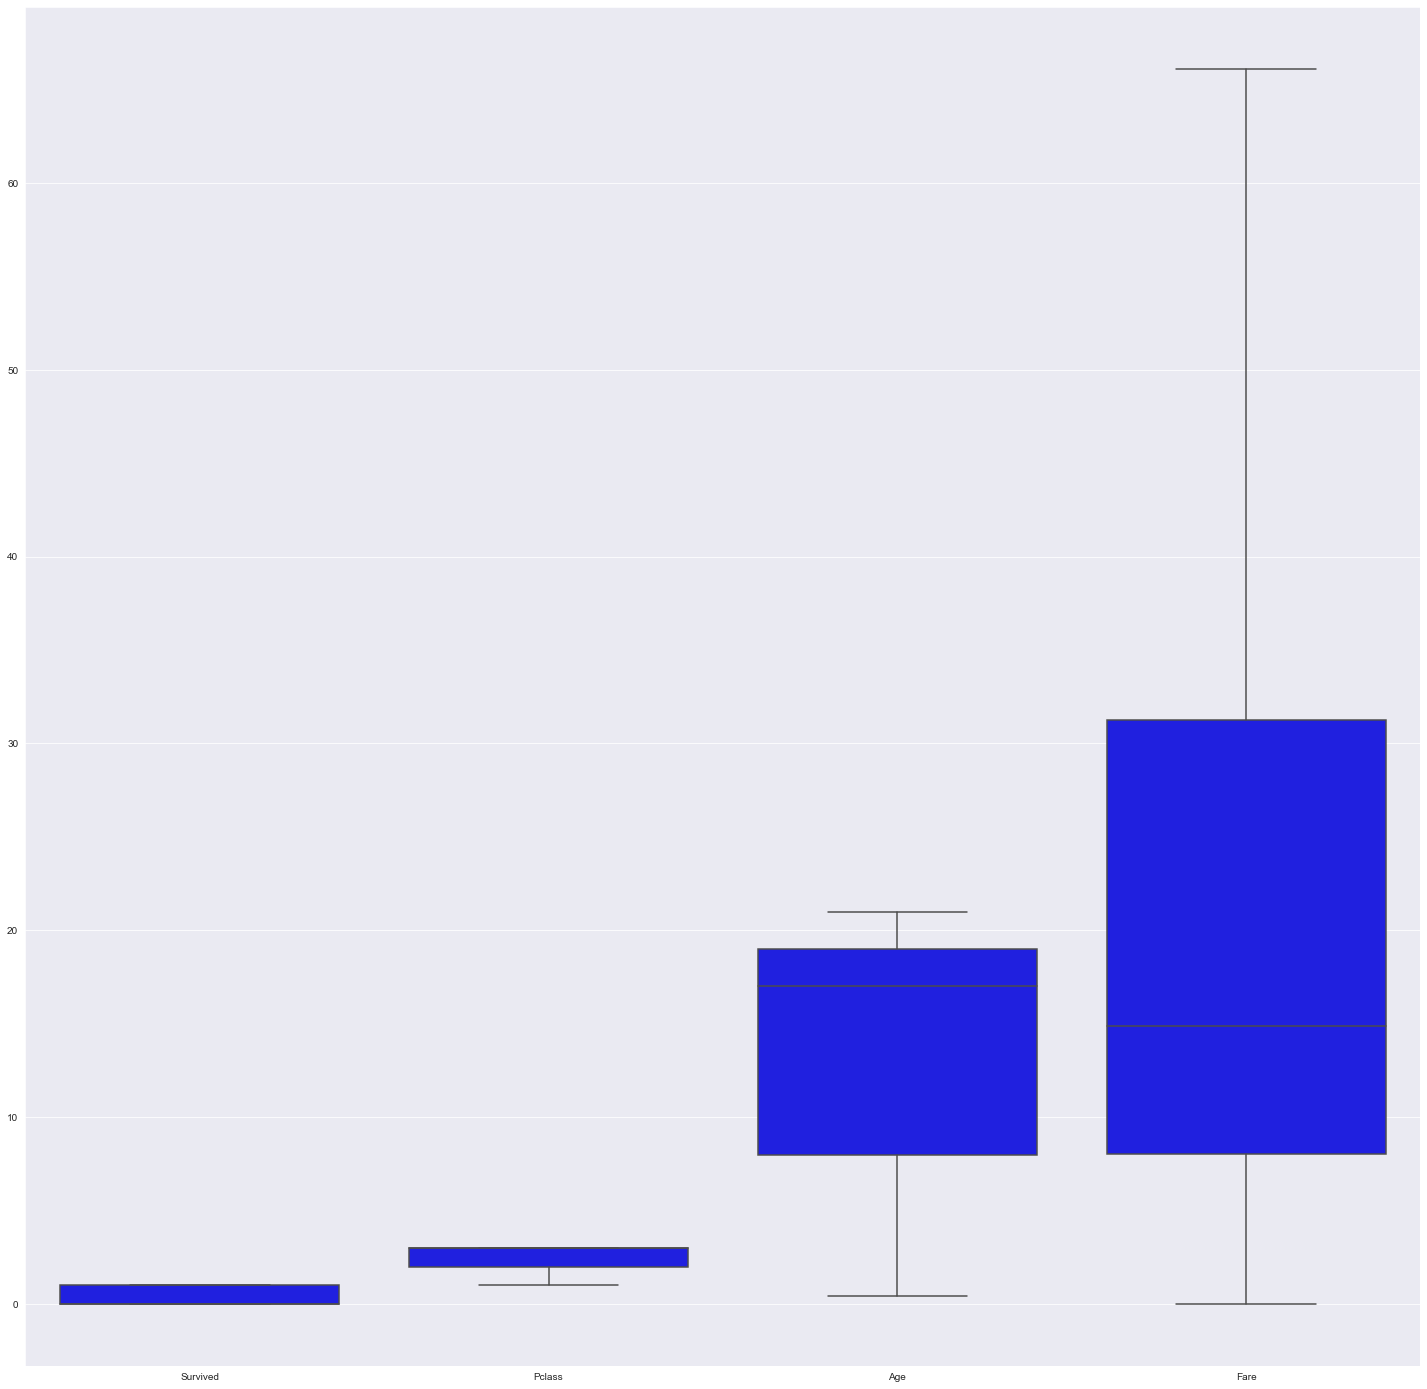

In [61]:
plt.figure(figsize=(25,25))
sns.boxplot(color='blue',data=df,)

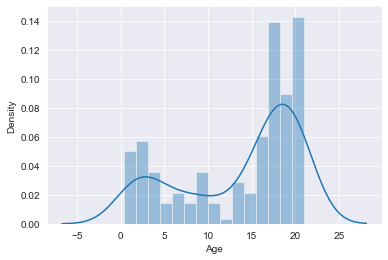

In [36]:
sns.distplot(df["Age"],bins=15,kde=True)
plt.show()

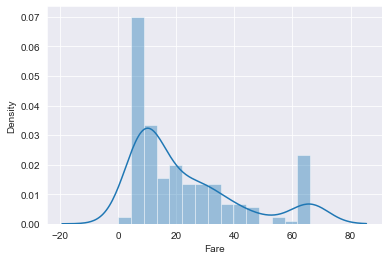

In [81]:
sns.distplot(df["Fare"],bins=15,kde=True)
plt.show()

In [83]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['Fare']=np.where(df['Fare']>upper_whisker,upper_whisker,np.where(df['Fare']<lower_whisker,lower_whisker,df['Fare']))

df["Fare"]

7      21.0750
9      30.0708
10     16.7000
12      8.0500
14      7.8542
        ...   
869    11.1333
875     7.2250
876     9.8458
877     7.8958
887    30.0000
Name: Fare, Length: 204, dtype: float64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 7 to 887
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  204 non-null    int64  
 1   Pclass    204 non-null    int64  
 2   Sex       204 non-null    object 
 3   Age       204 non-null    float64
 4   Fare      204 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 17.7+ KB


In [63]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [64]:

def clean_string(x):
    if x == 'female':
        return 1
    else:
        return 0

In [65]:

df['Sex'] = df['Sex'].apply(clean_string)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 7 to 887
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  204 non-null    int64  
 1   Pclass    204 non-null    int64  
 2   Sex       204 non-null    int64  
 3   Age       204 non-null    float64
 4   Fare      204 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 17.7 KB


In [67]:
X = df.drop('Survived',axis=1)
X

,Pclass,Sex,Age,Fare
7,3,0,2.0,21.0750
9,2,1,14.0,30.0708
10,3,1,4.0,16.7000
12,3,0,20.0,8.0500
14,3,1,14.0,7.8542
...,...,...,...,...
869,3,0,4.0,11.1333
875,3,1,15.0,7.2250
876,3,0,20.0,9.8458
877,3,0,19.0,7.8958


In [68]:
y = df['Survived']
y

7      0
9      1
10     1
12     0
14     0
      ..
869    1
875    1
876    0
877    0
887    1
Name: Survived, Length: 204, dtype: int64

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state= 20)

In [70]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
score = clf.score(X_test, y_test)

In [71]:
print(score)

0.8048780487804879


In [72]:
from sklearn.metrics import accuracy_score

In [73]:
acc_score  = accuracy_score(y_predicted,y_test)
acc_score

0.8048780487804879

In [74]:
from sklearn.metrics import classification_report,confusion_matrix

In [75]:
print(classification_report(y_predicted,y_test))

              precision    recall  f1-score   support

           0       0.93      0.81      0.86        31
           1       0.57      0.80      0.67        10

    accuracy                           0.80        41
   macro avg       0.75      0.80      0.76        41
weighted avg       0.84      0.80      0.81        41



In [76]:
confusion_matrix(y_predicted,y_test)

array([[25,  6],
       [ 2,  8]], dtype=int64)

In [77]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [78]:
fpr,tpr,thresholds = roc_curve(y_test,y_predicted) 

In [79]:
print('threshold', thresholds)
print('false positive rate', fpr)
print('true positive rate', tpr)

threshold [2 1 0]
false positive rate [0.         0.07407407 1.        ]
true positive rate [0.         0.57142857 1.        ]


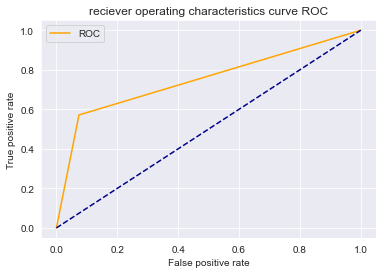

In [80]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1], [0,1],color='darkblue',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('reciever operating characteristics curve ROC')
plt.legend()
plt.show()